<a href="https://colab.research.google.com/github/helinatefera/10xWeek4/blob/task-1/notebooks/task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

In [39]:
data = pd.read_csv('/content/store.csv')
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')
clean_data = pd.read_csv('/content/clean_data.csv')

<ipython-input-39-e08127035647>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/train.csv')


In [5]:
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
len(data)

1115

In [8]:
# Check for missing values
missing_summary = data.isnull().sum()
print("Missing Values:\n", missing_summary)

# Describe numerical features to identify outliers
print(data.describe())

Missing Values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64
            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       Competition

In [10]:
# Custom function for handling outliers
def handle_outliers(X, method='cap_floor', quantile_range=(0.01, 0.99)):
    if method == 'cap_floor':
        lower_bound = X.quantile(quantile_range[0])
        upper_bound = X.quantile(quantile_range[1])
        return X.clip(lower_bound, upper_bound)
    return X


In [11]:
data["CompetitionDistance"] = data["CompetitionDistance"].fillna(data["CompetitionDistance"].mean())
data["CompetitionOpenSinceMonth"] = data["CompetitionOpenSinceMonth"].fillna(data["CompetitionOpenSinceMonth"].mean())
data["CompetitionOpenSinceYear"] = data["CompetitionOpenSinceYear"].fillna(data["CompetitionOpenSinceYear"].mean())
data["Promo2SinceWeek"] = data["Promo2SinceWeek"].fillna(data["Promo2SinceWeek"].mean())
data["Promo2SinceYear"] = data["Promo2SinceYear"].fillna(data["Promo2SinceYear"].mean())

In [15]:
print("Missing Values:\n", missing_summary)

Missing Values:
 Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64


## Distribution of CompetitionDistance

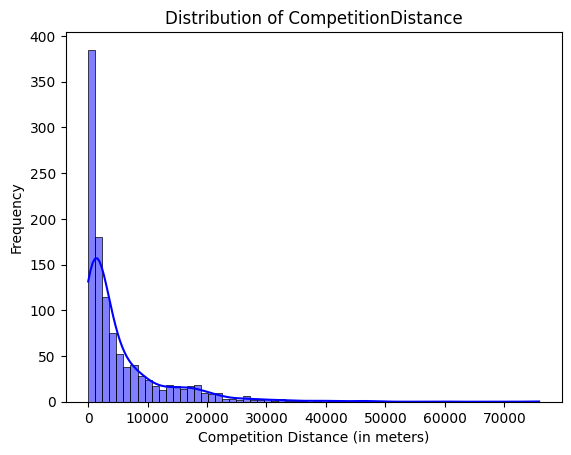

In [20]:
sns.histplot(data["CompetitionDistance"], kde=True, color='blue')
plt.title("Distribution of CompetitionDistance")
plt.xlabel("Competition Distance (in meters)")
plt.ylabel("Frequency")
plt.show()

In [29]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [30]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Distribution of Promo in Both Training and Testing Datasets

<ipython-input-31-555224272d44>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo', data=train, palette='Blues', alpha=0.7)


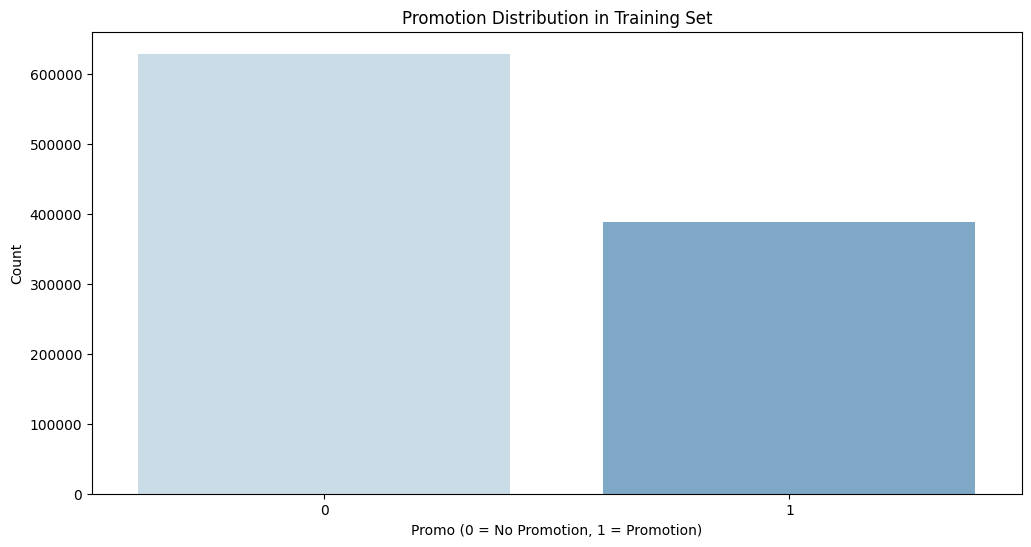

<ipython-input-31-555224272d44>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Promo', data=test, palette='Blues', alpha=0.7)


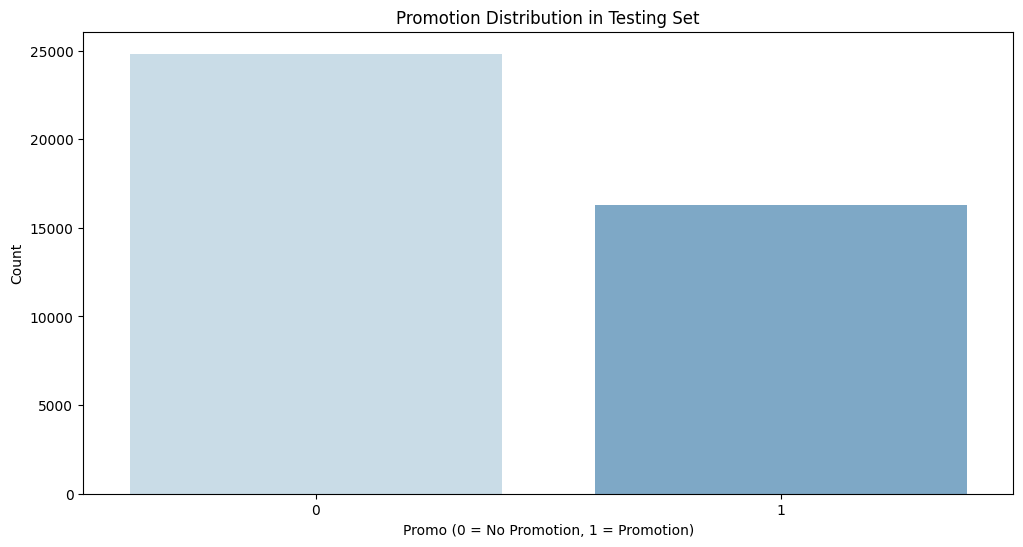

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Promo', data=train, palette='Blues', alpha=0.7)
plt.title('Promotion Distribution in Training Set')
plt.xlabel('Promo (0 = No Promotion, 1 = Promotion)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Promo', data=test, palette='Blues', alpha=0.7)
plt.title('Promotion Distribution in Testing Set')
plt.xlabel('Promo (0 = No Promotion, 1 = Promotion)')
plt.ylabel('Count')
plt.show()

The proportion of stores with promotions in both sets is **fairly consistent**, which helps ensure that your model will be exposed to similar conditions during both training and testing. However, different data sizes can still influence model performance due to the amount of data available for training versus testing.  **Larger training** set generally helps the model learn more patterns, leading to better generalization

In [40]:
clean_data.head()

,Date,Store,Store_Type,Store_Status,Promo,Promo2,School_Holiday,Customers,Sales,DayOfWeek,is_holiday
0,2021-01-01,1,supermarket,1,0,0,0,124,0,4,1
1,2021-01-02,1,pharmacy,1,0,0,0,87,0,5,0
2,2021-01-03,1,supermarket,1,1,0,0,74,778,6,0
3,2021-01-04,1,supermarket,0,1,0,0,0,0,0,0
4,2021-01-05,1,pharmacy,1,1,0,0,76,1002,1,0


# **Starting with the clean data**

Comparing sales behavior before, during, and after holidays, we can break down the data into three groups:

- **Before Holidays**: Sales data for days immediately preceding a holiday.
- **During Holidays**: Sales data for the holiday itself.
- **After Holidays**: Sales data for days immediately following a holiday.

In [44]:
# Convert 'Date' to datetime for manipulation
clean_data['Date'] = pd.to_datetime(clean_data['Date'])

# Identify holiday periods
clean_data['Holiday_Status'] = 'Regular'
clean_data.loc[clean_data['is_holiday'] == 1, 'Holiday_Status'] = 'During Holiday'

# Define before and after holiday
holiday_dates = clean_data[clean_data['is_holiday'] == 1]['Date'].unique()
for holiday_date in holiday_dates:
    before = holiday_date - timedelta(days=1)
    after = holiday_date + timedelta(days=1)
    clean_data.loc[clean_data['Date'] == before, 'Holiday_Status'] = 'Before Holiday'
    clean_data.loc[clean_data['Date'] == after, 'Holiday_Status'] = 'After Holiday'


In [46]:
sales_summary = clean_data.groupby('Holiday_Status')['Sales'].agg(['mean', 'median', 'std', 'count'])
print(sales_summary)


                      mean  median         std  count
Holiday_Status                                       
After Holiday   286.136585    24.0  455.674482    410
Before Holiday  329.130000    41.0  481.860168    400
During Holiday  303.284000    16.5  464.483220    250
Regular         304.154702    34.0  461.169835   9890


<ipython-input-49-6ca37a783e5f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Holiday_Status', y='Sales', data=clean_data, palette='viridis')


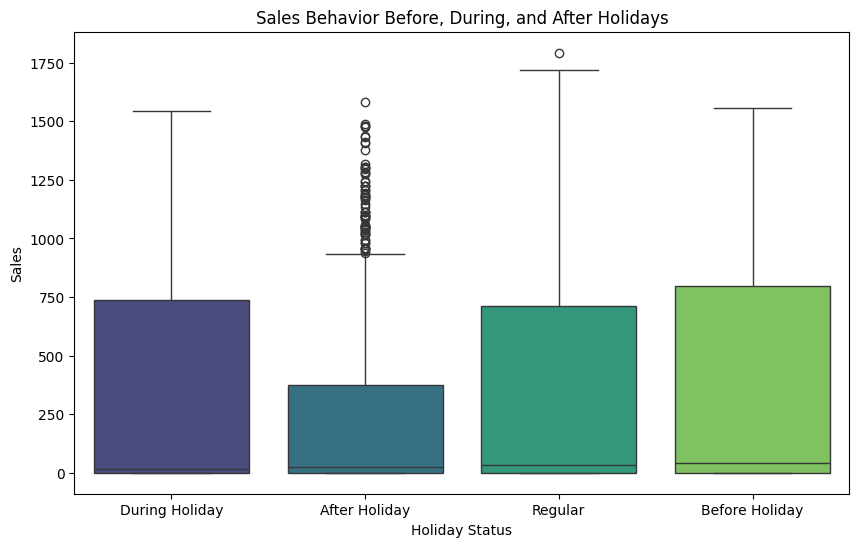

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday_Status', y='Sales', data=clean_data, palette='viridis')
plt.title('Sales Behavior Before, During, and After Holidays')
plt.xlabel('Holiday Status')
plt.ylabel('Sales')
plt.show()

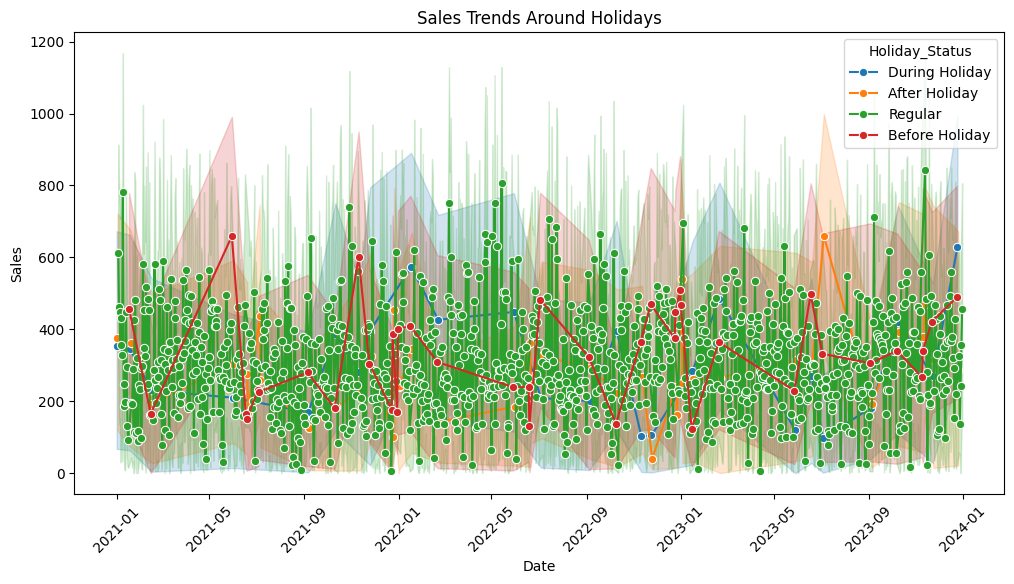

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='Holiday_Status', data=clean_data, marker='o')
plt.title('Sales Trends Around Holidays')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

 ## Correlation between sales and the number of customers

In [52]:
correlation = clean_data[['Sales', 'Customers']].corr()
print("Correlation Coefficient between Sales and Customers:")
print(correlation)

Correlation Coefficient between Sales and Customers:
              Sales  Customers
Sales      1.000000   0.243039
Customers  0.243039   1.000000


The correlation between **sales** and **customers** is **0.243**, indicating a **weak positive relationship**. This suggests that while more customers generally lead to higher sales, other factors (e.g., promotions, store type, holidays) significantly influence sales.

KeyError: 'Customers'

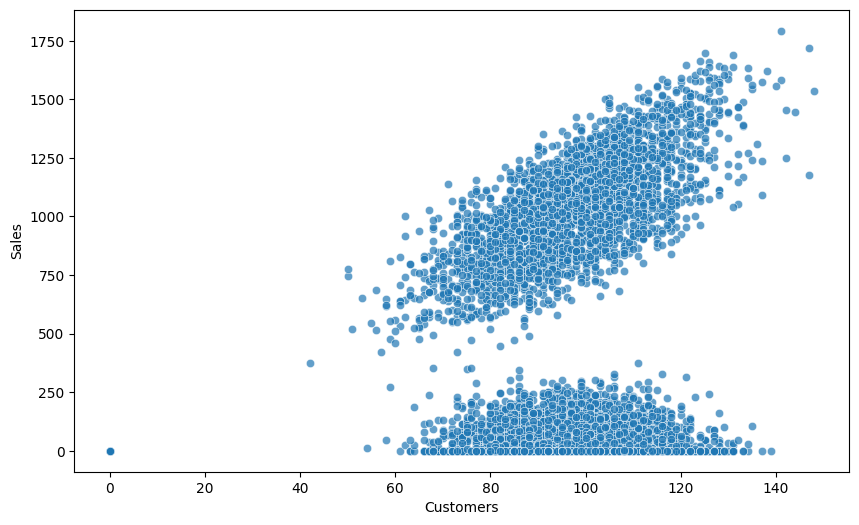